# Dask Array

Материалы:
* Макрушин С.В. Лекция 11: Dask
* https://docs.dask.org/en/latest/array.html
* JESSE C. DANIEL. Data Science with Python and Dask.

## Задачи для совместного разбора

1. Создайте массив размерностью 1000 на 300000, заполненный числами из стандартного нормального распределения. Исследуйте основные характеристики полученного массива.

In [ ]:
import numpy as np
# loc=0 - это параметр функции normal(), который устанавливает среднее значение распределения
# scale=1 - это параметр функции normal(), который устанавливает стандартное отклонение распределения
arr = np.random.normal(loc=0, scale=1, size=(1000, 300000))
print(arr)
print(arr.shape)
print(np.mean(arr))
#Стандартное отклонение массива
print(np.std(arr))
print()
print(np.min(arr))
print(np.max(arr))
print()
print(np.sum(arr))

[[ 0.62946159 -0.40796171  2.19021382 ...  0.94545931 -1.20666803
  -0.56590843]
 [ 0.10255999  0.75544878 -0.58563201 ...  0.39169922  0.31201344
   0.20878094]
 [-0.15548704 -0.1865585  -1.208825   ... -1.24556142 -0.39576772
  -0.38044803]
 ...
 [-0.81059843 -0.76035196 -0.08890917 ...  0.78608016 -0.27145214
   0.99396981]
 [-1.29189473 -1.0066146  -0.66182819 ... -0.15674282 -2.2302685
  -0.27498706]
 [ 0.52112745 -0.73485527  0.97775565 ...  0.45230928  0.47062448
   0.02786189]]
(1000, 300000)
1.1529383521296585e-05
1.000010212544935

-6.175545294412691
5.742541005845738

3458.8150563889753


2. Посчитайте сумму квадратов элементов массива, созданного в задаче 1. Создайте массив `np.array` такого же размера и сравните скорость решения задачи с использование `da.array` и `np.array`

In [ ]:
import dask.array as da
def func_1():
    arr1 = np.random.normal((1000, 300000))
    summa_1=np.sum(np.square(arr1))
    return summa_1

def func_2():
    arr2 = da.random.normal( size=(1000, 300000))
    summa_2 = da.sum(da.square(arr2))
    return summa_2

In [ ]:
%%time
print(func_1())

89999655225.26247
Wall time: 0 ns


In [ ]:
%%time
func_2().compute()

Wall time: 3.65 s


299982985.7520553

3. Визуализируйте граф вычислений для задачи 12.

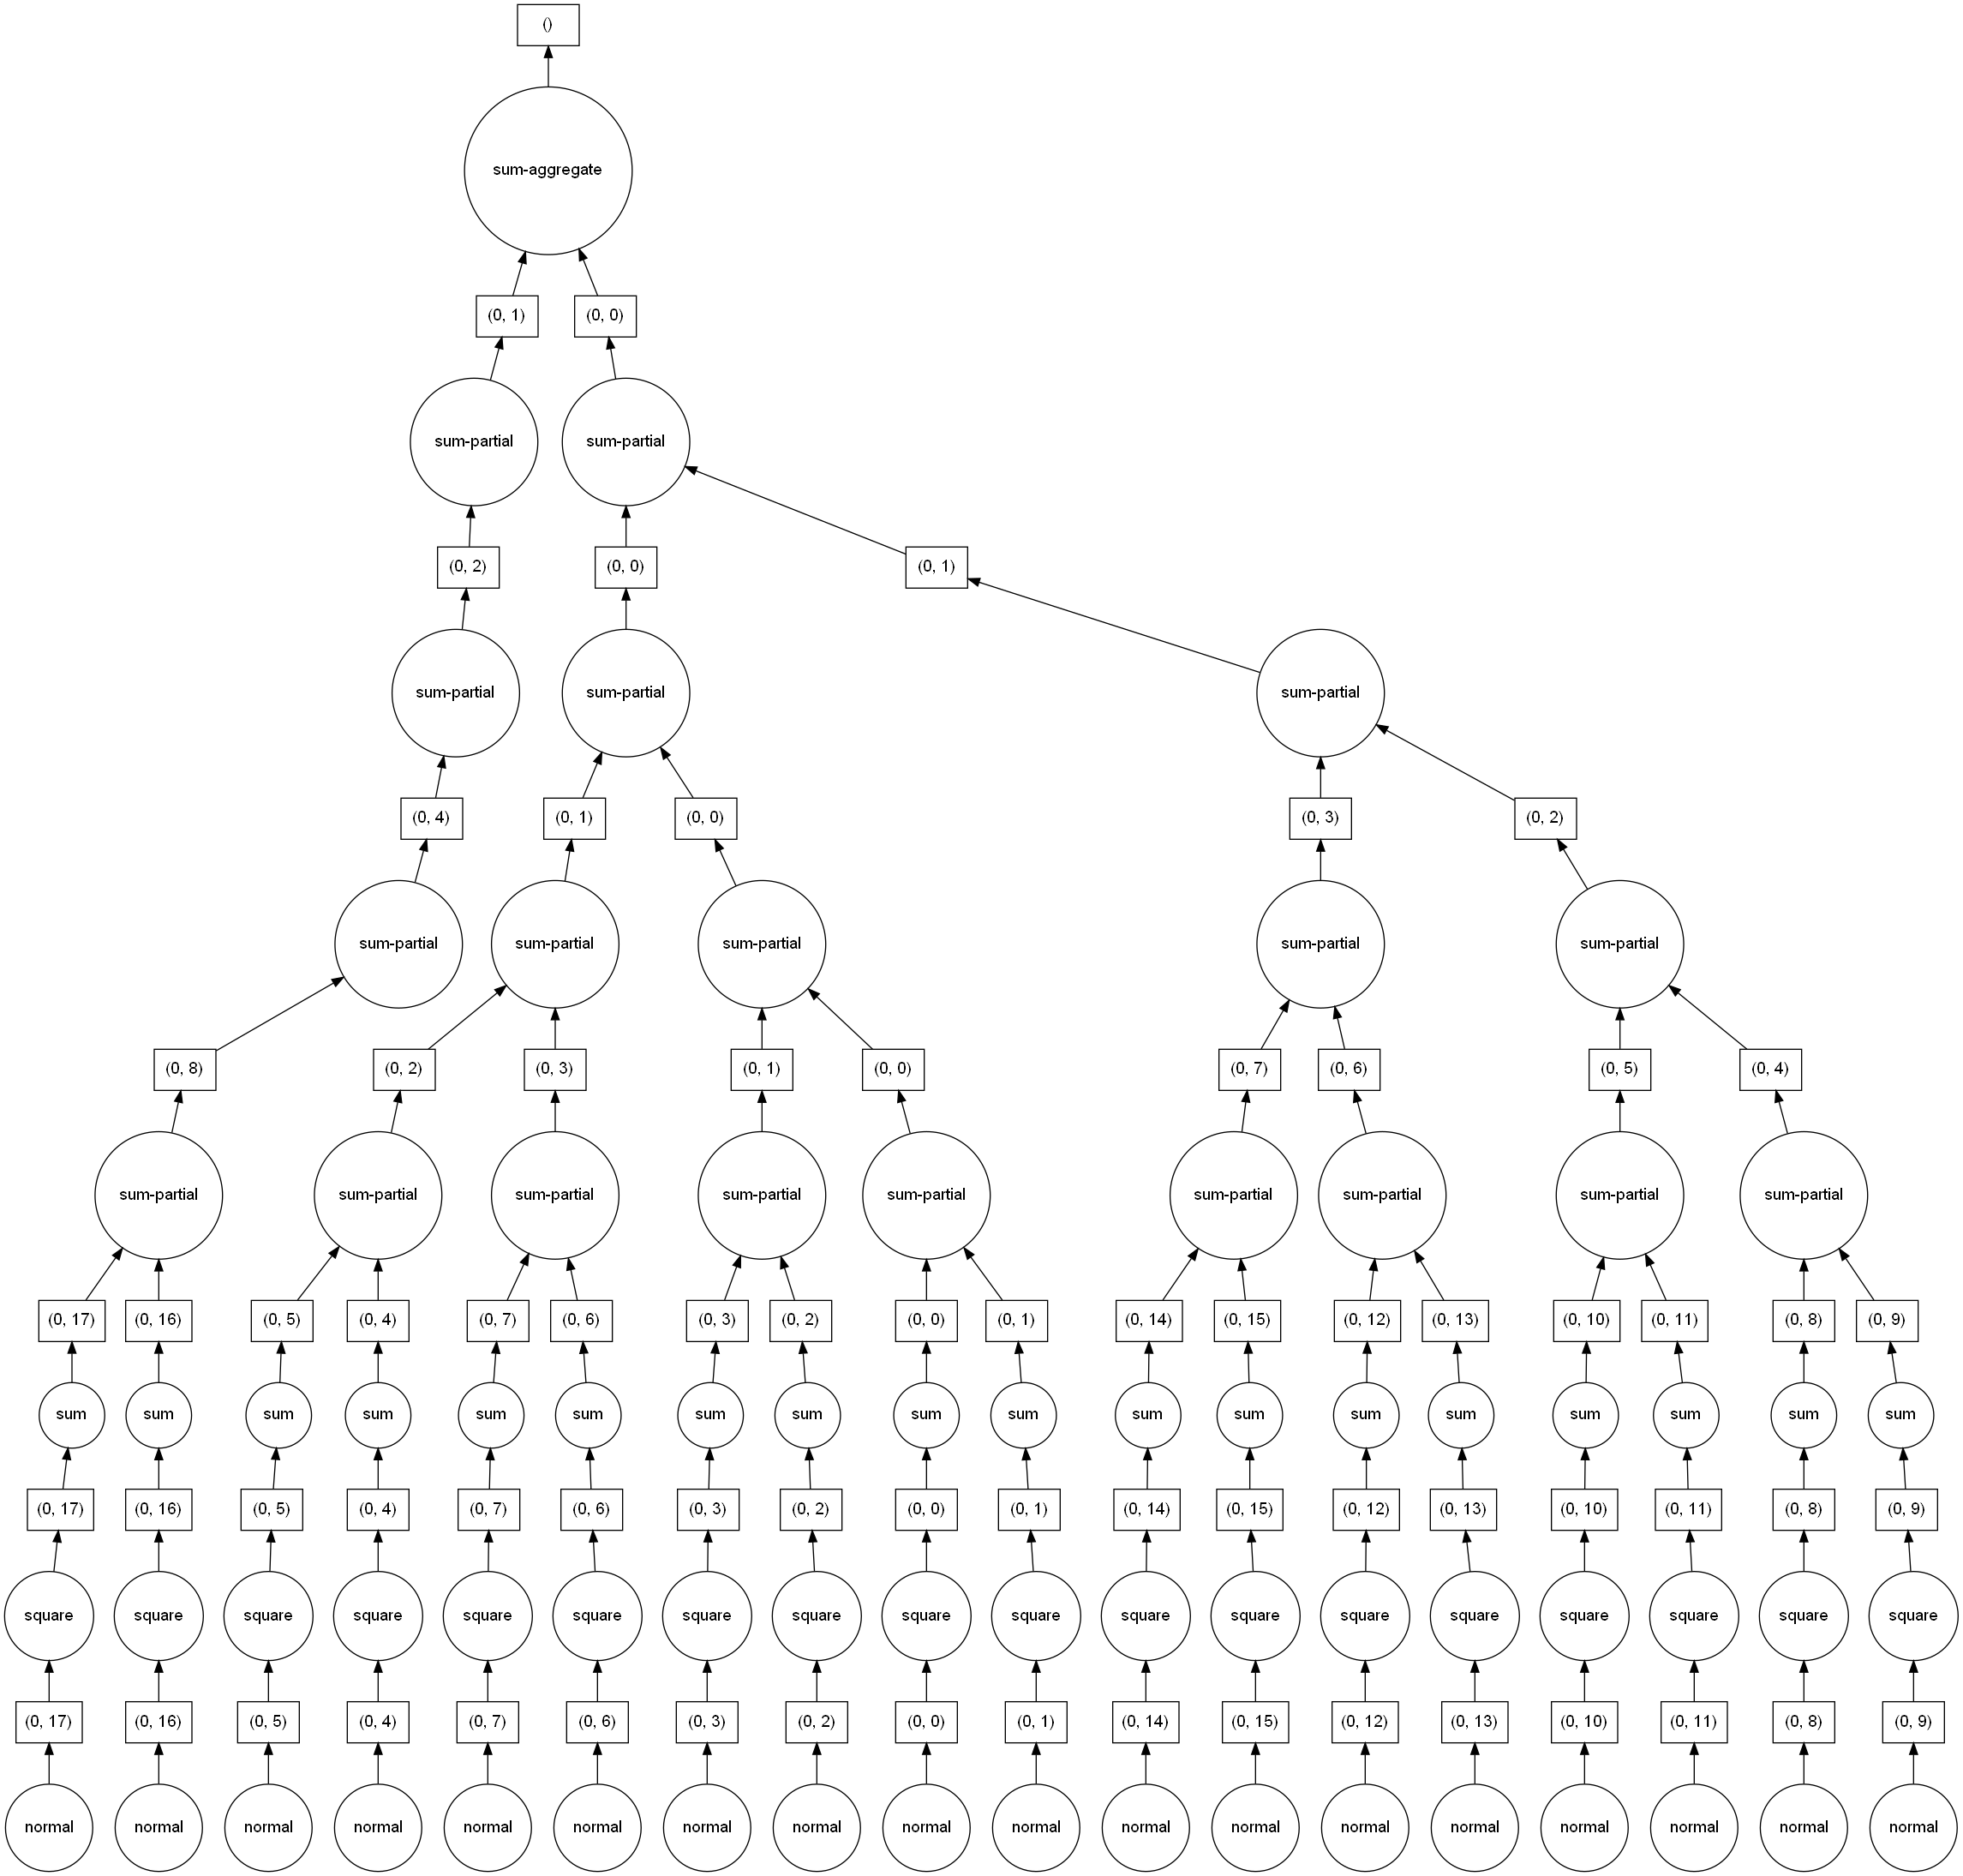

In [ ]:
func_2().visualize()

## Лабораторная работа 11

In [ ]:
import dask.array as da
import h5py
import numpy as np

In [ ]:
conda install -c conda-forge python-graphviz


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install graphviz

     -------------------------------------- 47.0/47.0 kB 337.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


1. Считайте датасет `recipe` из файла `minutes_n_ingredients_full.hdf5` в виде `dask.array`. Укажите аргумент `chunks=(100_000, 3)` при создании массива. Выведите на экран основную информацию о массиве.

In [ ]:
import dask.array as da

data_f = h5py.File('minutes_n_ingredients_full.hdf5', 'r')
print(list(data_f.keys()))

['recipe']


In [ ]:
data_set = data_f['recipe']
x_da = da.from_array(data_set, chunks=(100000, 3))
x_da

dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>

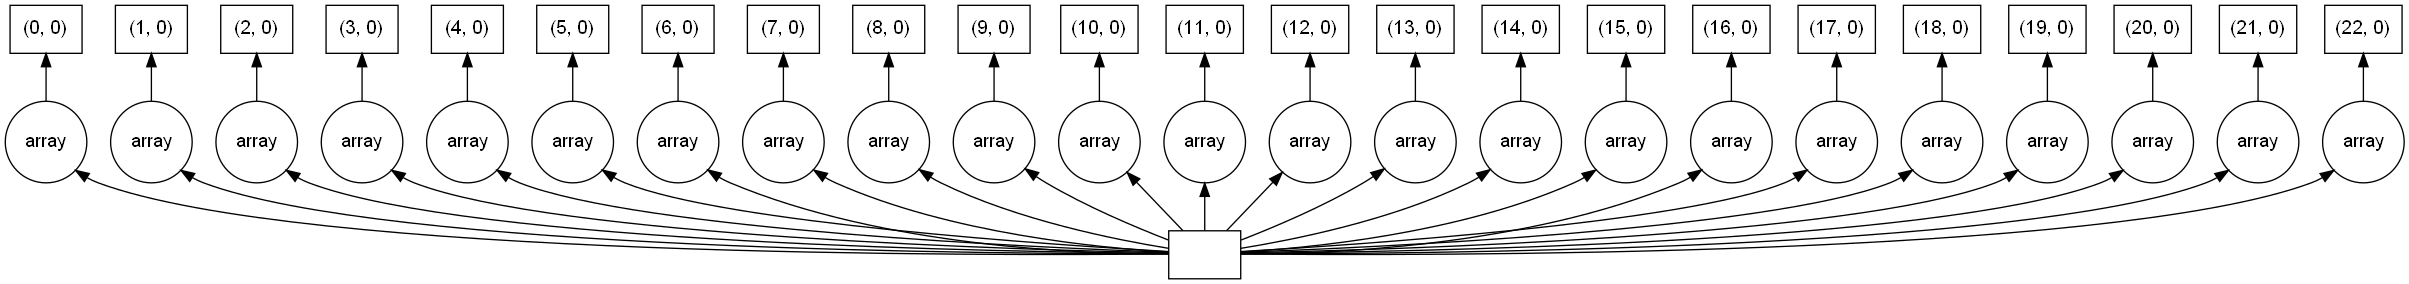

In [ ]:
x_da.visualize()

2. Вычислите среднее значение по каждому столбцу, кроме первого.

In [ ]:
mean_values = da.mean(x_da[:, 1:], axis=0)
print(mean_values.compute())

[1004.20805176    5.4198008 ]


3. Исследуйте, как влияет значение аргумента `chunks` при создании `dask.array` на скорость выполнения операции поиска среднего.

In [ ]:
# arr = da.random.randint(0, 100, size=(5, 4), chunks=(4, 4))
# print(arr.compute())
# # Получаем список блоков данных
# blocks = arr.blocks
# print(arr.chunks)
# # Выводим содержимое каждого блока
# for i, row in enumerate(blocks):
#     for j, block in enumerate(row):
#         chunk = da.from_array(np.array(block))
#         print(f"Chunk ({i}, {j}):")
#         print(chunk.compute())

In [ ]:
x_da_noChunks = da.from_array(data_set)
x_da_noChunks

dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(2231637, 3), chunktype=numpy.ndarray>

In [ ]:
def finding_average_1():
    mean_value= x_da.mean(axis=0)
    return mean_value.compute()
finding_average_1()

array([1.12684089e+06, 1.00420805e+03, 5.41980080e+00])

In [ ]:
def finding_average_2():
    mean_value= x_da_noChunks.mean(axis=0)
    return mean_value.compute()
finding_average_2()

array([1.12684089e+06, 1.00420805e+03, 5.41980080e+00])

In [ ]:
%%timeit
finding_average_1()

68.6 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
finding_average_2()

132 ms ± 7.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


|Chunks|No chunks|
|---|---|
|68.6 ms|132 ms|

Если размер chunk слишком маленький, то может произойти большое количество переключений между потоками и операции могут выполняться слишком медленно. Если размер chunk слишком большой, то может возникнуть проблема слишком больших блоков данных, которые не могут быть загружены в память и могут привести к ограничениям производительности. Также, без chunk программа вывполняется больше в 2 раза

4. Выберите рецепты, время выполнения которых меньше медианного значения

In [ ]:
x_da = da.from_array(data_set, chunks=(100000, 3))
display(x_da.compute())
median_column = da.median(x_da[:, 1], axis=0).compute()
print('Медианное значение:', median_column)
x_da_less = x_da[x_da[:, 1] < median_column]
display(x_da_less.compute())

array([[ 683970,      33,       9],
       [1089012,      23,       5],
       [1428572,       0,       5],
       ...,
       [1910650,      60,       2],
       [ 713836,       0,       9],
       [ 660699,      64,       8]], dtype=int64)

Медианное значение: 32.0


array([[1089012,      23,       5],
       [1428572,       0,       5],
       [1400250,      24,       1],
       ...,
       [1029131,      19,       4],
       [1700703,       1,       1],
       [ 713836,       0,       9]], dtype=int64)

5. Посчитайте количество каждого из возможных значений кол-ва ингредиентов

In [ ]:
import dask.dataframe as dd

df = dd.from_dask_array(x_da)
value_counts = df[2].value_counts().compute()
print(value_counts)

7     247181
9     246816
8     246747
6     244360
5     240720
4     234948
3     229388
2     224158
1     222071
10     22430
11     19094
12     15165
13     11640
14      8284
15      6014
16      4145
17      2793
18      1913
19      1279
20       852
21       529
22       346
23       244
24       178
25       107
26        68
27        55
28        33
29        22
30        20
31        13
32         5
33         4
35         4
34         3
37         2
40         2
36         1
38         1
39         1
43         1
Name: 2, dtype: int64


6. Найдите максимальную продолжительность рецепта. Ограничьте максимальную продолжительность рецептов сверху значением, равному 75% квантилю.

In [ ]:
print('MAX:', x_da[:, 1].max().compute())
q75 = df[1].quantile(q=0.75).compute()
print('Квантиль 75%:', q75)
print(x_da.compute())
new_x_1 = da.where(x_da[:, 1] > q75, q75, x_da[:, 1])
x_da[:, 1] = new_x_1
print('Ограниченный:', x_da.compute())

MAX: 2147483647
Квантиль 75%: 49.0
[[ 683970      33       9]
 [1089012      23       5]
 [1428572       0       5]
 ...
 [1910650      60       2]
 [ 713836       0       9]
 [ 660699      64       8]]
Ограниченный: [[ 683970      33       9]
 [1089012      23       5]
 [1428572       0       5]
 ...
 [1910650      49       2]
 [ 713836       0       9]
 [ 660699      49       8]]


7. Создайте массив `dask.array` из 2 чисел, содержащих ваши предпочтения относительно времени выполнения рецепта и кол-ва ингредиентов. Найдите наиболее похожий (в смысле $L_1$) рецепт из имеющихся в датасете.

In [ ]:
pref = [2100, 19]
da_pref = da.array(pref)
da_pref

dask.array<array, shape=(2,), dtype=int32, chunksize=(2,), chunktype=numpy.ndarray>

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.DataFrame(x_da.compute(), columns=['Ind','Время', 'Кол-во ингрдиентов'])
df1['Разница по времени'] = abs(df1['Время']-da_pref.compute()[0])
df1['Разница по ингредиентам'] = abs(df1['Кол-во ингрдиентов']-da_pref.compute()[1])
similar_recipe = df1.nsmallest(3, ['Разница по времени', 'Разница по ингредиентам'])

display(similar_recipe)

,Ind,Время,Кол-во ингрдиентов,Разница по времени,Разница по ингредиентам
458182,479440,2145,17,45,2
1384355,392719,2160,19,60,0
388116,53031,2160,20,60,1


8. Работая с исходным файлом в формате `hdf5`, реализуйте алгоритм подсчета среднего значения в блочной форме и вычислите с его помощью среднее значение второго столбца в массиве.

Блочный алгоритм вычислений состоит из двух частей:
1. Загрузка фрагмента за фрагментом данных по `blocksize` элементов и проведение вычислений на этим фрагментом
2. Агрегация результатов вычислений на различных фрагментах для получения результата на уровне всего набора данных

Важно: при работе с `h5py` в память загружаются не все элементы, а только те, которые запрашиваются в данный момент

In [ ]:
#1
data_f = h5py.File('minutes_n_ingredients_full.hdf5', 'r')
data_set = data_f['recipe']
x_da = da.from_array(data_set, chunks=(100000, 3))
mean_value = da.mean(x_da[:, 1], axis=0)
print(mean_value.compute())

1004.2080517575215


In [ ]:
x_da

dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>

In [ ]:
#2
blocksize = 100000
rows_amount = data_f['recipe'].shape[0]
summ, count = 0, 0

for i in range(0, rows_amount, blocksize):
    block = data_f['recipe'][i:i+blocksize, :]
    block_average = np.sum(block[:, 1]) / blocksize

    summ += block_sum
    count += block_count

dataset2_average = total_sum / total_count
dataset2_average

1004.2080517575215